# Data Exploration



## Preparation

The below code block is simply preparation:

__%matplotlib inline__: Tells Jupyter to display the graphs generated by matplotlib in the workbook.

__import numpy__: Loads 'numerical python', which provides the array objects we store data in.

__import matplotlib.pyplot as plt__: Loads an easy to use matplotlib interface, for plotting graphs.

Run the below code block by clicking the run icon (an arrow pointing at a line) in the icon line above or typing `ctrl-enter`. The `In[ ]:` next to it will change to `In[1]:` to indicate it was the first code block run.

In [1]:
%matplotlib inline

import numpy
import matplotlib.pyplot as plt

## Loading the Data

Step 1 of any data exploration task is to load the data. 

For this part of the exercise we will be classifying skin. Specifically, when you take a photograph some pixels are of peoples skin, others are not (e.g. they might be part of a mug of coffee). The machine learning task is to learn a classifier that identifies which pixels are skin and which are not given many exemplars. In a real application a  digital camera may use this as a first step in finding peoples faces, so that is can focus on them or avoid taking photos when people blink.

The inputs are: 
 * r - How much red is in the pixel, an integer in [0, 255].
 * g - How much green is in the pixel, an integer in [0, 255].
 * b - How much blue is in the pixel, an integer in [0, 255].

The output is:
 * 0 - It is a background pixel.
 * 1 - It is skin.



In [2]:
# Open the file for reading...
f = open('Skin_NonSkin.txt', 'r')

# Each line in the file is an exemplar, unless empty...
data = []
for line in f.readlines():
    parts = [int(v) for v in line.split()]
    if len(parts)==4:
        data.append(parts)

# Close file...
f.close()


# The data as loaded above is not very conveniant for processing - convert to numpy arrays.
# Note that the data in the file uses different conventions to those described above, so
# there is some cleanup to make it more conveniant...
data = numpy.array(data)

in_r = data[:,2]
in_g = data[:,1]
in_b = data[:,0]

out = data[:,3]
out[out==2] = 0


# Print out how many exemplars were loaded and some very basic statistics...
print('Number of exemplars:', out.shape[0])
print('Number of background pixels =', (out==0).sum())
print('Number of skin pixels =', (out==1).sum())

Number of exemplars: 245057
Number of background pixels = 194198
Number of skin pixels = 50859


## Train / Test Split


In [3]:
# This code generates the indices of exemplars for each kind...
index_bg = numpy.nonzero(out==0)[0] # bg is short for background.
index_skin = numpy.nonzero(out==1)[0]


# Split to get indices for each set...
half_bg = index_bg.shape[0] // 2
half_skin = index_skin.shape[0] // 2

index_train = numpy.concatenate((index_bg[:half_bg],index_skin[:half_skin]))
index_test = numpy.concatenate((index_bg[half_bg:],index_skin[half_skin:]))


# Now use the indices to generate the vectors of data for each case...
train_in_r = in_r[index_train]
train_in_g = in_g[index_train]
train_in_b = in_b[index_train]
train_out = out[index_train]

test_in_r = in_r[index_test]
test_in_g = in_g[index_test]
test_in_b = in_b[index_test]
test_out = out[index_test]

## 1. Basic Statistics

The below code prints out the global statistics, your task is to also print out the statistics for background and skin independently. 



In [4]:
print('Global:')
print('  Red: mean =', numpy.mean(train_in_r), '| sd =', numpy.std(train_in_r))
print('  Green: mean =', numpy.mean(train_in_g), '| sd =', numpy.std(train_in_g))
print('  Blue: mean =', numpy.mean(train_in_b), '| sd =', numpy.std(train_in_b))
print('')

# **************************************************************** 0.5 marks
print('Background:')
print('  Red: mean =', numpy.mean(train_in_r[train_out==0]), '| sd =', numpy.std(train_in_r[train_out==0]))  #train_out==0 ensures that only members with background tag are used for the calculation 
print('  Green: mean =', numpy.mean(train_in_g[train_out==0]), '| sd =', numpy.std(train_in_g[train_out==0]))
print('  Blue: mean =', numpy.mean(train_in_b[train_out==0]), '| sd =', numpy.std(train_in_b[train_out==0]))
print('')

print('Skin:')
print('  Red: mean =', numpy.mean(train_in_r[train_out==1]), '| sd =', numpy.std(train_in_r[train_out==1])) #train_out==1 ensures that only members with skin tag are used for the calculation
print('  Green: mean =', numpy.mean(train_in_g[train_out==1]), '| sd =', numpy.std(train_in_g[train_out==1]))
print('  Blue: mean =', numpy.mean(train_in_b[train_out==1]), '| sd =', numpy.std(train_in_b[train_out==1]))
print('')

Global:
  Red: mean = 114.88769913815618 | sd = 75.18217758110548
  Green: mean = 124.14228584486811 | sd = 64.75743226985364
  Blue: mean = 119.23729270044397 | sd = 66.73829385809498

Background:
  Red: mean = 94.66869895673487 | sd = 67.69313702726875
  Green: mean = 120.30854076767011 | sd = 68.59341818552605
  Blue: mean = 122.28493599316162 | sd = 70.65863369859589

Skin:
  Red: mean = 192.0926501238743 | sd = 47.07941024001938
  Green: mean = 138.78119469896575 | sd = 44.38303251625984
  Blue: mean = 107.60006292028785 | sd = 47.18406864719033



## 2. The Simplest Classifier

Probably the simplest classifier is a single if statement based on a test, e.g.
```
if feature < 12:
    return 1
else:
    return 0
```

For continuous features such as colour `less than` or `greater than` tests are a good choice.


In [5]:
# Write a classification function...
def is_skin1(r, g, b):
    # **************************************************************** 1 mark
    if (r>=145 and r<=239 and g>=94 and g<=182 and b>=60 and b<=154):          #The classifier is based on the mean and spread within one standard deviation for every colour. The values have been rounded off to the nearest integer
        return 1                    #skin
    else:
        return 0                    #background
    pass

# Code to test classificatuion performance on the test set...
estimate = numpy.array([is_skin1(test_in_r[i], test_in_g[i], test_in_b[i]) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_r.shape[0])

print('Got', percentage, '% correct')

Got 93.68067967583184 % correct


## 3. Visualisation for a Better Guess

Looking at just the mean and standard deviation is no way to make a guess, even though it does surprisingly well in this case. A better choice is to look at colour coded scatter plots of the data. As you can only look at two dimensions at a time (your screen is flat) and we have three features a good approach is to plot all combinations of two variables, e.g. red vs green, red vs blue and green vs blue. 

Red vs Green:


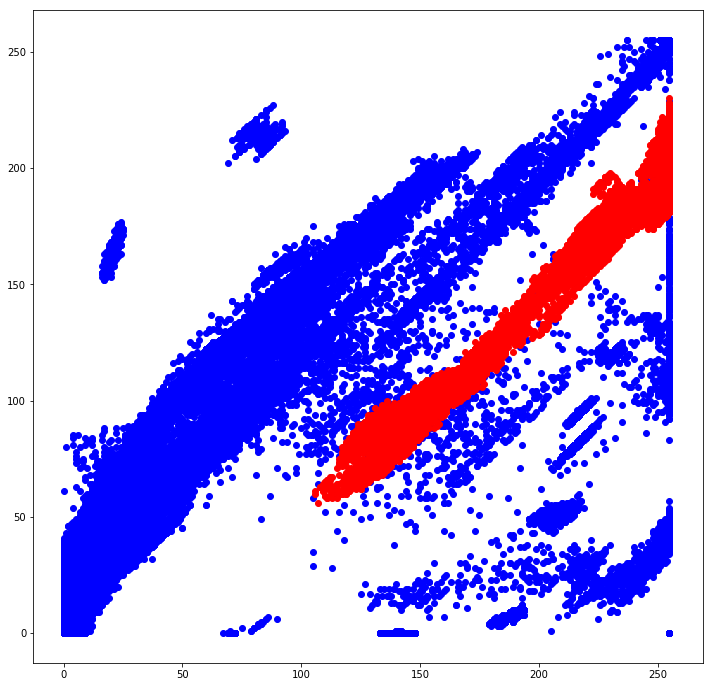

Red vs Blue:


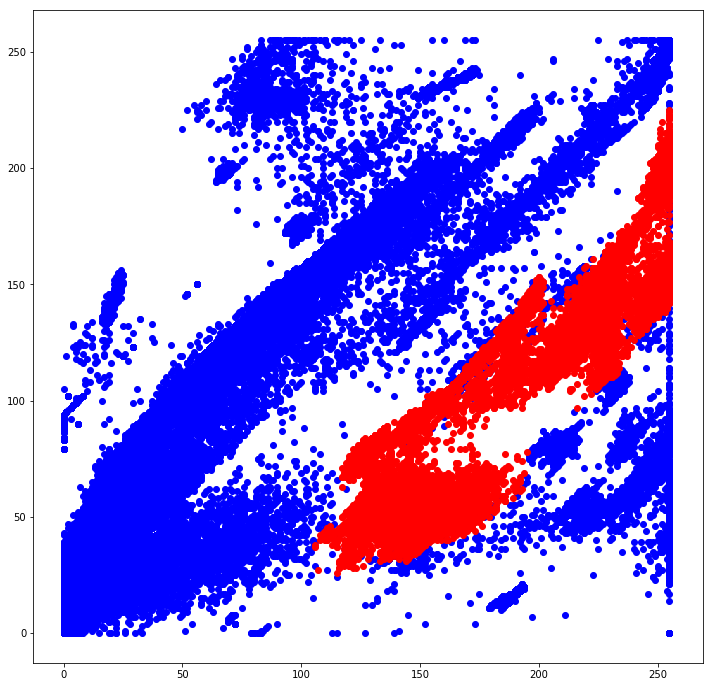

Green vs Blue:


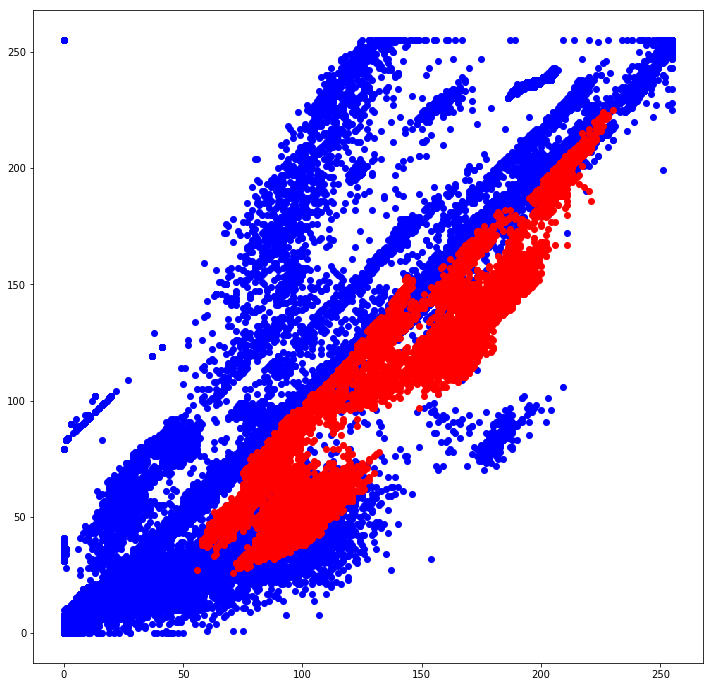

In [6]:
print('Red vs Green:')
plt.figure(figsize=(12,12))
plt.scatter(train_in_r[train_out==0], train_in_g[train_out==0], c='b') # c='b' means blue, for background.
plt.scatter(train_in_r[train_out==1], train_in_g[train_out==1], c='r') # c='r' means red, for, errr, skin.
plt.show()

# **************************************************************** 0.5 marks
print('Red vs Blue:')
plt.figure(figsize=(12,12))
plt.scatter(train_in_r[train_out==0], train_in_b[train_out==0], c='b') # c='b' blue for background.
plt.scatter(train_in_r[train_out==1], train_in_b[train_out==1], c='r') # c='r' red for skin.
plt.show()

print('Green vs Blue:')
plt.figure(figsize=(12,12))
plt.scatter(train_in_g[train_out==0], train_in_b[train_out==0], c='b') # c='b' blue for background.
plt.scatter(train_in_g[train_out==1], train_in_b[train_out==1], c='r') # c='r' red for skin.
plt.show()

## 4. Better Classifier

Instead of applying the split (`if` statement) to a feature directly we can calculate some function of several features. For instance, we could sum two features

```
if g+b > 42:
    return 1
else:
    return 0
```

Additionally, instead of a simple split we could consider distance from an ideal value,

```
if numpy.fabs((g+b) - 22) < 8:
    return 1
else:
    return 0
```

In the above `22` is the ideal value and `8` the threshold, so the above considers any pixel where `g+b` is between `22-8` and `22+8` to be skin. Note that `22` and `8` can be derived from the mean and variance of the skin respectively (for some multipliar of the variance). A good choice of function and ideal value/threshold should seperate the two classes.



In [7]:
# Transform the training features to create a new 'function' of the data,
# that is a single value per exemplar that is helpful for classifying skin
# assuming the the application of a less than/greater than test.
# Include an explanation of why you choose it (as a comment)...

# **************************************************************** 2 marks
train_func = train_in_r[train_out==1] - train_in_g[train_out==1]            #As the graph of Red vs Green showed a clear seperation between background
                                                                            #and skin data points without excessive misclassification, the red and green
                                                                            #vectors have been used as a classifier.
# Print out simple statistics for your function of the data...

# **************************************************************** 0 marks
m = numpy.mean(train_func)
s = numpy.std(train_func)
print(m,' ',s)


# Write a new and improved classifier - this will be the same as the transform
# above, but with the less than/greater than check and as an actual function...
def is_skin2(r, g, b):
    # **************************************************************** 1 marks
    
    if numpy.fabs((r-g) - m) < s:                                          #m 'mean' is the ideal value and s 'standard deviation' is the threshold value for the classifier equation 
        return 1                      #skin
    else:
        return 0                      #background
    pass


# Code to test classification performance on the test set...
estimate = numpy.array([is_skin2(test_in_r[i], test_in_g[i], test_in_b[i]) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_r.shape[0])

print('Got', percentage, '% correct')

53.311455424908566   8.342602224580162
Got 85.81560283687944 % correct


## 5. Machine Learning

Unlike the above where you coded the function directly, now you need to code a function of some parameters and then find the best parameters. A very common function is a linear sum of the features, specifically `r*sr + g*sg + b*sb` where `sr`, `sg` and `sb` are the parameters to be learned. We can then consider distance from an ideal value, introducing two further parameters, `ideal` for the ideal value and `threshold` to decide how close to the ideal value you have to be to be considered as skin.


In [8]:
# Code a function to classify an input colour (r,g b) which is driven by the 5 parameters above...
def is_skin3(r, g, b, sr, sg, sb, ideal, threshold):
    # **************************************************************** 1 marks
    train_func = r*sr + g*sg + b*sb
    
    if numpy.fabs(train_func - ideal) < threshold:
        return 1              #skin
    else:
        return 0              #background
    pass


# Fill in this function that scores the train data and return the percentage of right values for the train data...
def score(sr, sg, sb, ideal, threshold):
    # **************************************************************** 1 mark
    correct_estimations = 0                                  #Counts the number of correct estimations by the classifier
    right_values = len(train_in_r[train_out==1])             #Stores the data members with skin tag
    actual = numpy.array([is_skin3(train_in_r[i], train_in_g[i], train_in_b[i], sr, sg, sb, ideal, threshold) for i in range(train_in_r.shape[0])])   #Calls is_skin3() for each data member and stores all the outputs in a numpy array
    training_correct = (actual==train_out).sum()             #Finds the total number of correct responses in training
    print(training_correct)
    percentage = 100.0 * training_correct / float(train_in_r.shape[0]) #Calculates the score which is percentage of correct responses from total responses
    print(percentage)
    return percentage
    pass


# Write a (nested) loop that tries out lots of different parameters.
# A sugestion for the outer level of the loop has been provided for you.
best_score = -1.0
best_sr = None
best_sg = None
best_sb = None
best_ideal = None
best_threshold = None

all_ideal_values = train_in_r[train_out==1]*0.5 + train_in_g[train_out==1]*0.5 + train_in_b[train_out==1]*0.5 #Trivial values for sr, sg and sb are used   
ideal = numpy.mean(all_ideal_values)     #First iteration value for ideal
threshold = numpy.std(all_ideal_values)  #First iteration value for threshold


for sr in [-1.0, -0.5, 0.0, 0.5, 1.0]:                #Triple nested loop to iterate over each values of sr, sg and sb
    # **************************************************************** 2 marks
    for sg in [-1.0, -0.5, 0.0, 0.5, 1.0]:
        for sb in [-1.0, -0.5, 0.0, 0.5, 1.0]:
            print('Trying sr =', sr,' Trying sg =', sg,' Trying sb =', sb)
            new_score = score(sr, sg, sb, ideal, threshold)     #New score is calculated at every iteration by calling the score function
            if(new_score > best_score):                         #If the new score is better i.e. greater than the best score 
                best_score = new_score                          #then all the 'best' values are replaced by values corresponding to the new score.
                best_sr = sr
                best_sg = sg
                best_sb = sb
                best_ideal = ideal
                best_threshold = threshold
             


# This code will judge the classifier your computer has learned...
estimate = numpy.array([is_skin3(test_in_r[i], test_in_g[i], test_in_b[i], best_sr, best_sg, best_sb, best_ideal, best_threshold) for i in range(test_in_r.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_r.shape[0])

print('Final classifier:')
print('  sr =', best_sr)
print('  sg =', best_sg)
print('  sb =', best_sb)
print('  ideal =', best_ideal)
print('  threshold =', best_threshold)
print('')
print('  Got', percentage, '% correct')

Trying sr = -1.0  Trying sg = -1.0  Trying sb = -1.0
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -1.0  Trying sb = -0.5
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -1.0  Trying sb = 0.0
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -1.0  Trying sb = 0.5
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -1.0  Trying sb = 1.0
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -0.5  Trying sb = -1.0
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -0.5  Trying sb = -0.5
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -0.5  Trying sb = 0.0
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -0.5  Trying sb = 0.5
97099
79.24637633846957
Trying sr = -1.0  Trying sg = -0.5  Trying sb = 1.0
97099
79.24637633846957
Trying sr = -1.0  Trying sg = 0.0  Trying sb = -1.0
97099
79.24637633846957
Trying sr = -1.0  Trying sg = 0.0  Trying sb = -0.5
97099
79.24637633846957
Trying sr = -1.0  Trying sg = 0.0  Trying sb = 0.0
97099
79.24637633846957
Trying sr

59600
48.641943066074695
Trying sr = 1.0  Trying sg = 0.0  Trying sb = -1.0
94180
76.86406372420997
Trying sr = 1.0  Trying sg = 0.0  Trying sb = -0.5
103045
84.09914468529642
Trying sr = 1.0  Trying sg = 0.0  Trying sb = 0.0
96208
78.51919561243145
Trying sr = 1.0  Trying sg = 0.0  Trying sb = 0.5
60291
49.2058957952468
Trying sr = 1.0  Trying sg = 0.0  Trying sb = 1.0
90228
73.63867850613737
Trying sr = 1.0  Trying sg = 0.5  Trying sb = -1.0
108774
88.77481065552364
Trying sr = 1.0  Trying sg = 0.5  Trying sb = -0.5
100949
82.3885152781405
Trying sr = 1.0  Trying sg = 0.5  Trying sb = 0.0
59110
48.24203447375294
Trying sr = 1.0  Trying sg = 0.5  Trying sb = 0.5
88398
72.14514233481327
Trying sr = 1.0  Trying sg = 0.5  Trying sb = 1.0
95740
78.13724209976495
Trying sr = 1.0  Trying sg = 1.0  Trying sb = -1.0
98387
80.29756463828676
Trying sr = 1.0  Trying sg = 1.0  Trying sb = -0.5
59401
48.479531209193
Trying sr = 1.0  Trying sg = 1.0  Trying sb = 0.0
86495
70.59202794463306
Trying s

## 6. Another Data Set

Included with this worksheet is the file `synthetic.txt`.  Each row of the file contains 3 numbers, seperated by spaces. The first 2 are the input feature vector, the final value is the class. Your task is to repeat the above for this new data set.


Number of exemplars: 512
Number of class 0 pixels = 224
Number of class 1 pixels = 288
Global:
  Feature 1: mean = 0.47448828125000003 | sd = 0.2862113781589944
  Feature 2: mean = 0.508109375 | sd = 0.29316460911424724

Class 0:
  Feature 1: mean = 0.7361964285714286 | sd = 0.16093010013699127
  Feature 2: mean = 0.5960267857142857 | sd = 0.29055908115161083

Class 1:
  Feature 1: mean = 0.2709375 | sd = 0.17545097521775452
  Feature 2: mean = 0.4397291666666667 | sd = 0.2764792090523164

Got 75.78125 % correct
Feature 1 vs Feature 2:


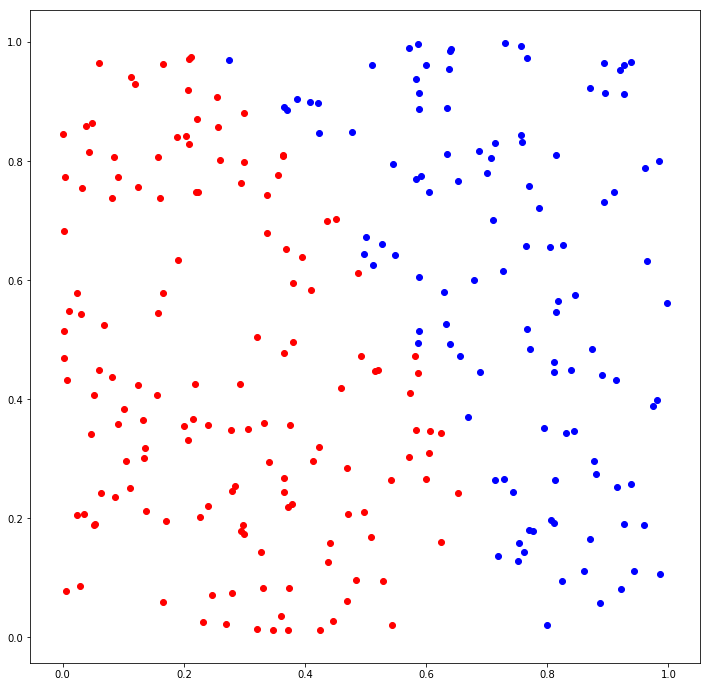

2.436517857142857   0.3791264979750647
Got 86.71875 % correct
Trying sf1 = -1.0  Trying sf2 = -1.0
144
0.11752415774353617
Trying sf1 = -1.0  Trying sf2 = -0.5
144
0.11752415774353617
Trying sf1 = -1.0  Trying sf2 = 0.0
144
0.11752415774353617
Trying sf1 = -1.0  Trying sf2 = 0.5
144
0.11752415774353617
Trying sf1 = -1.0  Trying sf2 = 1.0
133
0.10854661791590493
Trying sf1 = -1.0  Trying sf2 = 1.5
121
0.09875293810394359
Trying sf1 = -1.0  Trying sf2 = 2.0
133
0.10854661791590493
Trying sf1 = -1.0  Trying sf2 = 2.5
142
0.11589187777487595
Trying sf1 = -0.5  Trying sf2 = -1.0
144
0.11752415774353617
Trying sf1 = -0.5  Trying sf2 = -0.5
144
0.11752415774353617
Trying sf1 = -0.5  Trying sf2 = 0.0
144
0.11752415774353617
Trying sf1 = -0.5  Trying sf2 = 0.5
144
0.11752415774353617
Trying sf1 = -0.5  Trying sf2 = 1.0
130
0.1060981979629146
Trying sf1 = -0.5  Trying sf2 = 1.5
140
0.11425959780621572
Trying sf1 = -0.5  Trying sf2 = 2.0
145
0.11834029772786628
Trying sf1 = -0.5  Trying sf2 = 2.5

In [9]:
# **************************************************************** 6 marks
#PART 1: Loading the data set
%matplotlib inline

import numpy
import matplotlib.pyplot as plt


f = open('synthetic.txt', 'r')                 #Open the file for reading

data = []
for line in f.readlines():                     #Read each line in the file 
    parts = [v for v in line.split(' ')]       #As each data member is seperated by a ' '
    if len(parts)==3:                          
        data.append(parts)

f.close()                                      #Close file



#PART 2: Getting the data ready
data = numpy.array(data)

in_f1 = data[:,0]                            #Feature 1 as f1
in_f2 = data[:,1]                            #Feature 2 as f2
in_f1 = in_f1.astype(numpy.float)            #Convert type string to float
in_f2 = in_f2.astype(numpy.float)

out = data[:,2]

for i in range(len(out)):
    out[i] = out[i].strip()                 #Removes /n from every data member
    
    
out = out.astype(numpy.int)                 #Convert type string to int


#All Exemplars loaded 
print('Number of exemplars:', out.shape[0])
print('Number of class 0 pixels =', (out==0).sum())
print('Number of class 1 pixels =', (out==1).sum())


index_class0 = numpy.nonzero(out==0)[0]     
index_class1 = numpy.nonzero(out==1)[0]


half_class0 = index_class0.shape[0] // 2   #Split to get indices for each set
half_class1 = index_class1.shape[0] // 2

index_train = numpy.concatenate((index_class0[:half_class0],index_class1[:half_class1]))  #Dividing the data set into train and test
index_test = numpy.concatenate((index_class0[half_class0:],index_class1[half_class1:]))


train_in_f1 = in_f1[index_train]           #Indices used to generate the vectors of data for each case
train_in_f2 = in_f2[index_train]
train_out = out[index_train]

test_in_f1 = in_f1[index_test]
test_in_f2 = in_f2[index_test]
test_out = out[index_test]



#PART 3: Exploration

#Printing mean and standard deviation for complete data set, class0 and class1
print('Global:')
print('  Feature 1: mean =', numpy.mean(train_in_f1), '| sd =', numpy.std(train_in_f1))
print('  Feature 2: mean =', numpy.mean(train_in_f2), '| sd =', numpy.std(train_in_f2))
print('')

print('Class 0:')
print('  Feature 1: mean =', numpy.mean(train_in_f1[train_out==0]), '| sd =', numpy.std(train_in_f1[train_out==0]))
print('  Feature 2: mean =', numpy.mean(train_in_f2[train_out==0]), '| sd =', numpy.std(train_in_f2[train_out==0]))
print('')

print('Class 1:')
print('  Feature 1: mean =', numpy.mean(train_in_f1[train_out==1]), '| sd =', numpy.std(train_in_f1[train_out==1]))
print('  Feature 2: mean =', numpy.mean(train_in_f2[train_out==1]), '| sd =', numpy.std(train_in_f2[train_out==1]))
print('')


#Basic classification function
def is_class0(f1, f2):
    
    if (f1>=0.575 and f1<=0.897 and f2>=0.305 and f2<=0.887):
        return 0
    else:
        return 1
    pass

#Computing classification performance on the test set
estimate = numpy.array([is_class0(test_in_f1[i], test_in_f2[i]) for i in range(test_in_f1.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_f1.shape[0])

print('Got', percentage, '% correct')


#Graph of Feature 1 v/s Feature 2
print('Feature 1 vs Feature 2:')
plt.figure(figsize=(12,12))
plt.scatter(train_in_f1[train_out==0], train_in_f2[train_out==0], c='b') # c='b' means blue, for class 0.
plt.scatter(train_in_f1[train_out==1], train_in_f2[train_out==1], c='r') # c='r' means red, for class 1.
plt.show()


#Improved classification function
train_func = 2.5*train_in_f1[train_out==0] + train_in_f2[train_out==0] 


#Simple statistics for the function
m = numpy.mean(train_func)
s = numpy.std(train_func)
print(m,' ',s)

def is_class02(f1, f2):
    if numpy.fabs((2.5*f1+f2) - m) < s:
        return 0
    else:
        return 1
    pass


#Computing classification performance on the test set
estimate = numpy.array([is_class02(test_in_f1[i], test_in_f2[i]) for i in range(test_in_f1.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_f1.shape[0])

print('Got', percentage, '% correct')



#PART 4: Classification Algorithm

# Classifies an input (f1, f2) into class 0 or class 1
def is_class03(f1, f2, sf1, sf2, ideal, threshold): 
    train_func = f1*sf1 + f2*sf2 
    
    if numpy.fabs(train_func - ideal) < threshold:
        return 0
    else:
        return 1
    pass


#Scores the training data and returns the percentage of right values for the train data
def score(sf1, sf2, ideal, threshold):
    
    correct_estimations = 0
    right_values = len(train_in_f1[train_out==1])
    actual = numpy.array([is_class03(train_in_f1[i], train_in_f2[i], sf1, sf2, ideal, threshold) for i in range(train_in_f1.shape[0])])
    training_correct = (actual==train_out).sum()
    print(training_correct)
    percentage = 100.0 * training_correct / float(train_in_r.shape[0])
    print(percentage)
    return percentage
    pass


#Trying different sf1 and sf2 values so to optimize these parameters
best_score = -1.0
best_sf1 = None
best_sf2 = None
best_ideal = None
best_threshold = None

all_ideal_values = train_in_f1[train_out==1]*1.0 + train_in_f2[train_out==1]*2.75
ideal = numpy.mean(all_ideal_values)
threshold = numpy.std(all_ideal_values)


for sf1 in [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]:
    
    for sf2 in [-1.0, -0.5, 0.0, 0.5, 1.0, 1.5, 2.0, 2.5]:
        print('Trying sf1 =', sf1,' Trying sf2 =', sf2)
        new_score = score(sf1, sf2, ideal, threshold)
        if(new_score > best_score):
            best_score = new_score
            best_sf1 = sf1
            best_sf2 = sf2
            best_ideal = ideal
            best_threshold = threshold
             


#Computing classification performance on the test set
estimate = numpy.array([is_class03(test_in_f1[i], test_in_f2[i], best_sf1, best_sf2, best_ideal, best_threshold) for i in range(test_in_f1.shape[0])])

correct = (estimate==test_out).sum()
percentage = 100.0 * correct / float(test_in_f1.shape[0])

print('Final classifier:')
print('  sf1 =', best_sf1)
print('  sf2 =', best_sf2)
print('  ideal =', best_ideal)
print('  threshold =', best_threshold)
print('')
print('  Got', percentage, '% correct')